Import library untuk kebutuhan pemrosesan data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

read csv data

In [3]:
df = pd.read_csv('cybersecurity_attacks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [44]:
df

,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment
0,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,No Alets,Malware,Known Pattern B,Logged,Low,Segment A
1,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,No Alets,Malware,Known Pattern A,Blocked,Low,Segment B
2,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C
3,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Not Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B
4,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Not Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,IoC Detected,39.28,No Alets,DDoS,Known Pattern A,Logged,Medium,Segment A
39996,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,IoC Detected,27.25,No Alets,DDoS,Known Pattern A,Logged,High,Segment C
39997,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,IoC Detected,31.01,No Alets,DDoS,Known Pattern B,Blocked,Low,Segment C
39998,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Segment B


menghapus beberapa data attribute yang tidak terpakai

In [4]:
df.drop(
    ['Timestamp',
     'Payload Data',
     'User Information',
     'Device Information',
     'Geo-location Data',
     'Proxy Information',
     'Firewall Logs',
     'IDS/IPS Alerts',
     'Log Source'
     ],
    axis=1,inplace=True
)

cek collumns yang tersedia untuk di pakai dalam pemrosesan data

In [5]:
df.columns

Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment'],
      dtype='object')

cek missing value data

In [6]:
df.isna().values.any()
print("df is {}".format(df.shape))
df.isnull().sum()

df is (40000, 16)


Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
Network Segment               0
dtype: int64

replace data missing value yang sudah di sesuaikan

In [7]:
df['Malware Indicators'].fillna('Not Detected',inplace=True)
df['Alerts/Warnings'].fillna('No Alets',inplace=True)

/tmp/ipykernel_10048/4271925692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Malware Indicators'].fillna('Not Detected',inplace=True)
/tmp/ipykernel_10048/4271925692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

cek missing value setelah menambahkan value untuk mengisi kekosongan data

In [8]:
df.isna().values.any()
print("df is {}".format(df.shape))
df.isnull().sum()

df is (40000, 16)


Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
Network Segment           0
dtype: int64

Text(0, 0.5, 'Count')

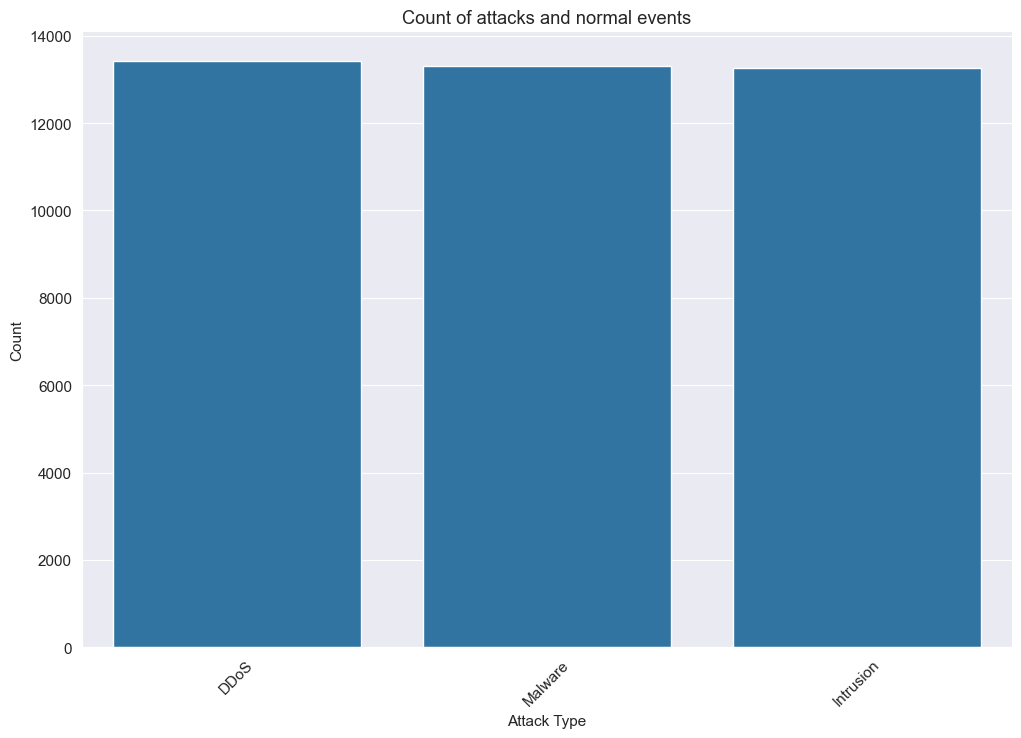

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)

font = {"size" : 11}
plt.rc('font',**font)

grouped_label = df.groupby("Attack Type")["Attack Type"].count().sort_values(ascending=False)
plt.xticks(rotation=45)

sns.barplot(x=grouped_label.index, y=grouped_label.values)
plt.title("Count of attacks and normal events")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

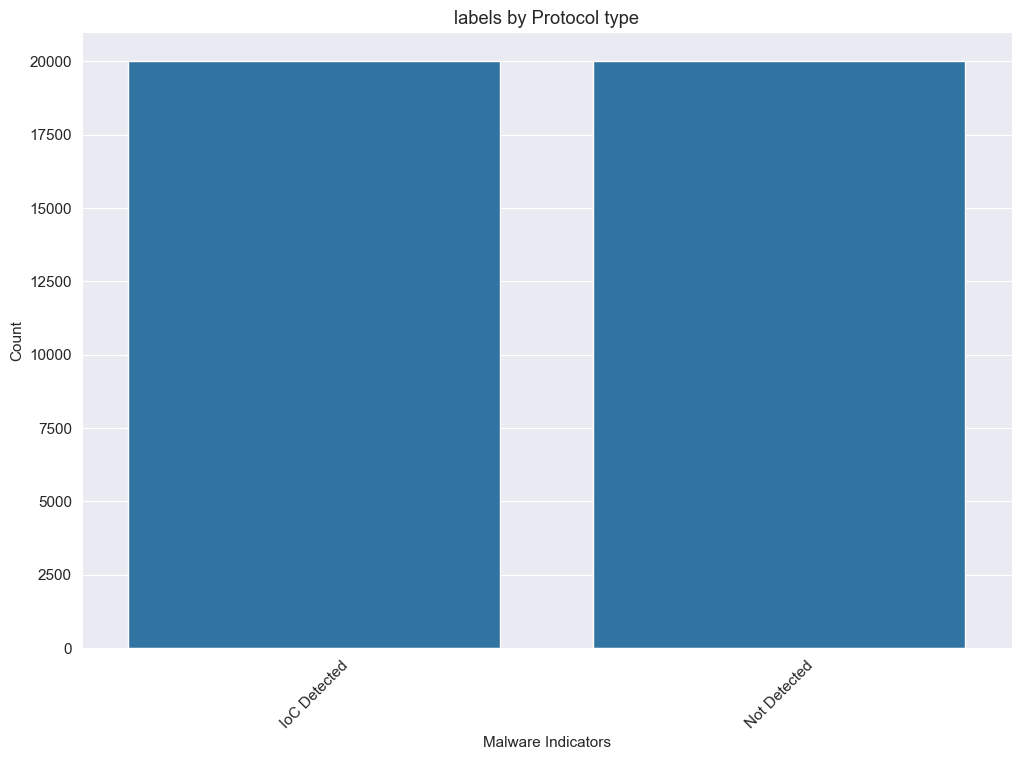

In [32]:
grouped_labels = df.groupby("Malware Indicators")["Malware Indicators"].count().sort_values(ascending=False)
plt.xticks(rotation=45)

sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("labels by Protocol type")
plt.ylabel("Count")

Text(0.5, 1.0, 'Class balance')

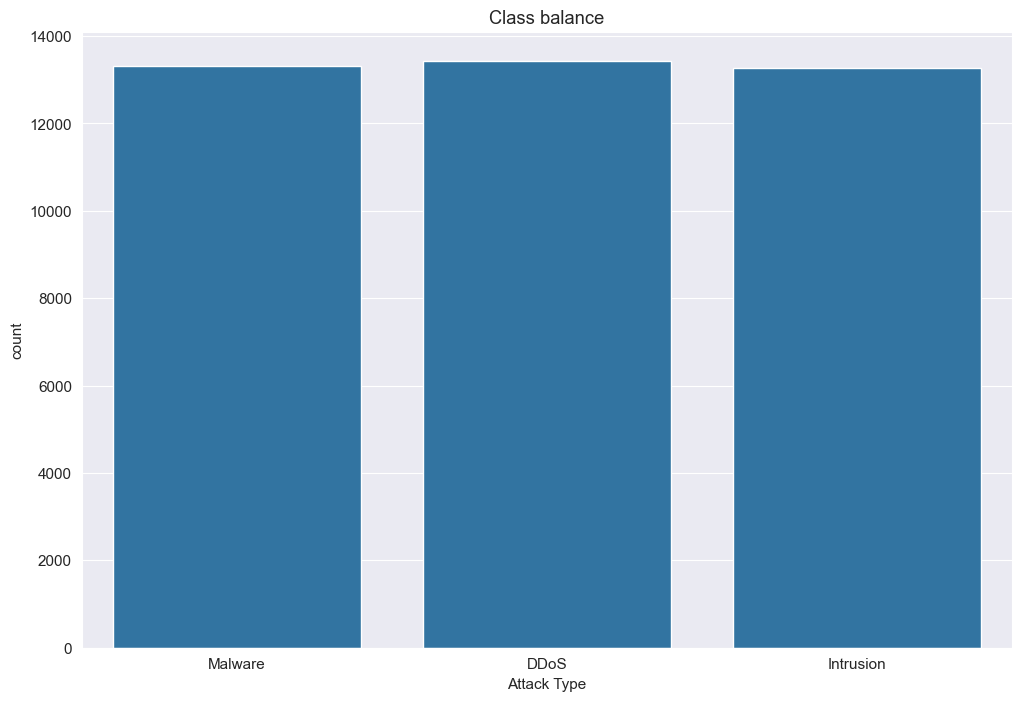

In [33]:
sns.countplot(x="Attack Type", data=df)
plt.title("Class balance")

Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

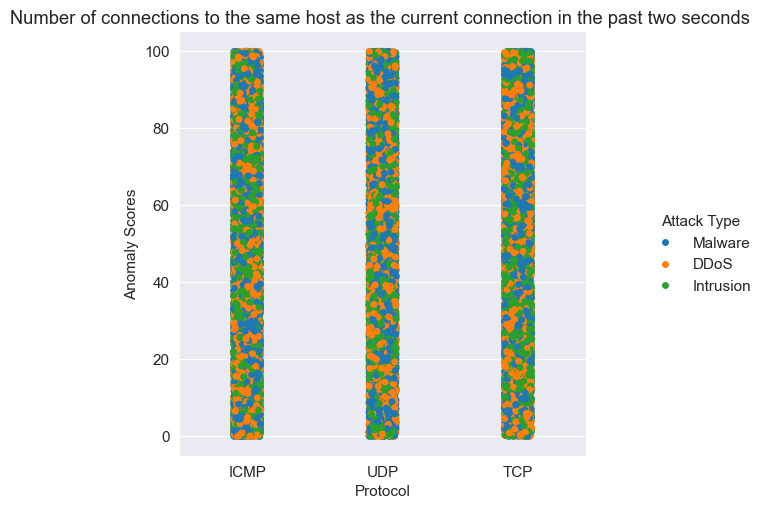

In [35]:
sns.catplot(x="Protocol", y="Anomaly Scores", hue="Attack Type", data=df)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

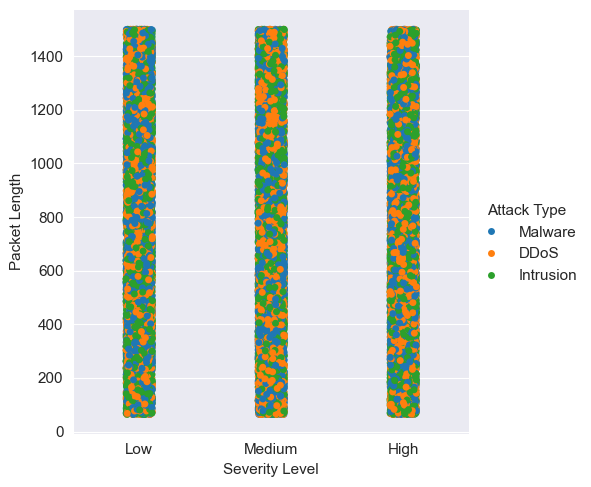

In [42]:
sns.catplot(x="Severity Level", y="Packet Length", hue="Attack Type", data=df)

splitting dataset sesuai kebutuhan

setting categorical features

In [10]:
categorical_features = [
    # 'Source IP Address',
    # 'Destination IP Address',
    # 'Source Port',
    # 'Destination Port',
    'Protocol',
    'Packet Type',
    'Traffic Type',
    'Alerts/Warnings',
    'Attack Type',
    'Attack Signature',
    'Action Taken',
    'Severity Level',
    'Network Segment'
]

setting numerical features

In [11]:
numerical_features = [
    'Packet Length',
    'Anomaly Scores'
]

split dataset dengan 80% 20%

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
X = df['Severity Level'].values
y = df['Alerts/Warnings'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_


array(['Alert Triggered', 'No Alets'], dtype='<U15')

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_test_tfidf)

  (0, 0)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 1)	1.0
  (11, 2)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 2)	1.0
  (15, 1)	1.0
  (16, 2)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 2)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 2)	1.0
  :	:
  (7975, 0)	1.0
  (7976, 2)	1.0
  (7977, 1)	1.0
  (7978, 1)	1.0
  (7979, 2)	1.0
  (7980, 1)	1.0
  (7981, 2)	1.0
  (7982, 2)	1.0
  (7983, 1)	1.0
  (7984, 2)	1.0
  (7985, 0)	1.0
  (7986, 2)	1.0
  (7987, 1)	1.0
  (7988, 2)	1.0
  (7989, 0)	1.0
  (7990, 2)	1.0
  (7991, 0)	1.0
  (7992, 1)	1.0
  (7993, 2)	1.0
  (7994, 2)	1.0
  (7995, 0)	1.0
  (7996, 1)	1.0
  (7997, 0)	1.0
  (7998, 0)	1.0
  (7999, 0)	1.0


transform attribute

In [18]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [19]:
# categorical_transformer = Pipeline(steps=[
#     ('onehot',OneHotEncoder(handle_unknown='ignore'))
# ])
# numerical_transformer = Pipeline(steps=[
#     ('scaler',StandardScaler())
# ])

percobaan logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
lr = LogisticRegression()

In [22]:
# X_train = pd.get_dummies(X_train, columns=[numerical_features])
# X_test = pd.get_dummies(X_test, columns=[numerical_features])

In [23]:
X_train

array(['Medium', 'Low', 'High', ..., 'Low', 'Low', 'Medium'], dtype=object)

In [24]:
lr.fit(X_train_tfidf,y_train)
y_pred = lr.predict(X_test_tfidf)

In [25]:
for pred, Attack in zip(y_pred[:5], X_test[:5]):
    print(f'Pred: {pred} - Attack Type: {Attack}\n')

Pred: 1 - Attack Type: High

Pred: 1 - Attack Type: Medium

Pred: 1 - Attack Type: Medium

Pred: 1 - Attack Type: Medium

Pred: 1 - Attack Type: High



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[   0, 4051],
       [   0, 3949]])

In [28]:
tn,fp,fn,tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 0
FP: 4051
FN: 0
TP: 3949


In [29]:
import matplotlib.pyplot as plt

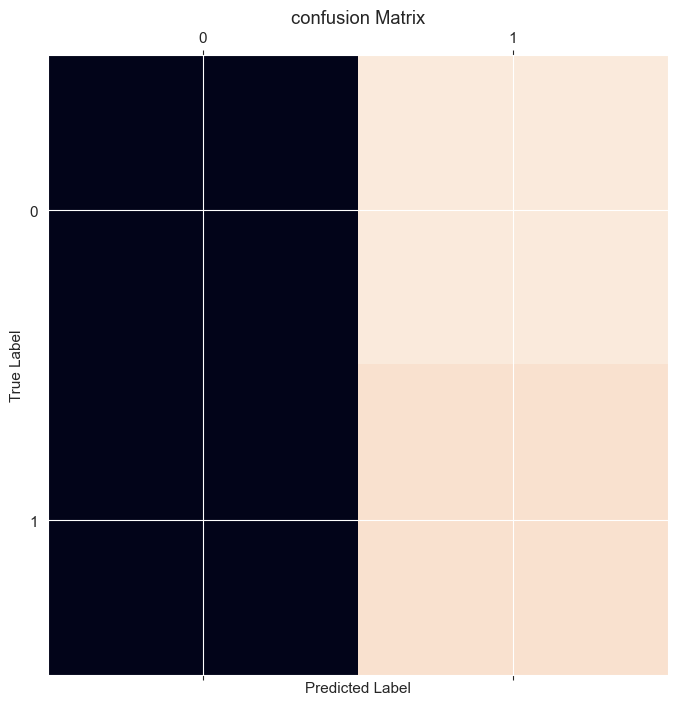

In [30]:
plt.matshow(matrix)
plt.colorbar

plt.title('confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.493625